In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: therealnightmare
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 1.23GB/s]

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")

In [6]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
data_df.dropna(inplace= True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df)

       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0      4537        92.229316        64.012769      0.719916        4677   
1      2872        74.691881        51.400454      0.725553        3015   
2      3048        76.293164        52.043491      0.731211        3132   
3      3073        77.033628        51.928487      0.738639        3157   
4      3693        85.124785        56.374021      0.749282        3802   
...     ...              ...              ...           ...         ...   
18180  5853       148.624571        51.029281      0.939210        6008   
18181  7585       169.593996        58.141659      0.939398        7806   
18182  6365       154.777085        52.908085      0.939760        6531   
18183  5960       151.397924        51.474600      0.940427        6189   
18184  6134       153.081981        51.590606      0.941500        6283   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0          76.004525  0

In [8]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [9]:
print(data_df["Class"].unique)

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64>


In [10]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [11]:
original_df = data_df.copy()

for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [12]:
x = np.array(data_df.iloc[:, :-1])
y = np.array(data_df.iloc[:, -1])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

In [14]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test, test_size=0.5)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [16]:
class dataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32).to(device)
    self.y = torch.tensor(y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.x)

  def __getitem__ (self,index):
    return self.x[index], self.y[index]


In [17]:
training_data = dataset(x_train,y_train)
validation_data = dataset(x_val,y_val)
testing_data = dataset(x_test,y_test)

In [18]:
train_dataloader = DataLoader(training_data,batch_size=32,shuffle=True)
val_dataloader = DataLoader(validation_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(testing_data,batch_size=32,shuffle=True)

In [19]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(x.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x  = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [20]:
summary(model,(x.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [21]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [22]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc__validation_plot = []

epochs=10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs,labels  = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in val_dataloader:
      inputs,labels = data

      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction,labels)

      total_loss_val += batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()

      total_acc_val += acc

  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_val/1000,4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
  total_acc__validation_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

  print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
  print("="*25)

Epoch no. 1 Train Loss: 0.2233 Train Accuracy: 91.2798 Validation Loss: 0.0352 Validation Accuracy: 97.9839
Epoch no. 2 Train Loss: 0.1061 Train Accuracy: 97.9339 Validation Loss: 0.0151 Validation Accuracy: 97.5806
Epoch no. 3 Train Loss: 0.0510 Train Accuracy: 98.3895 Validation Loss: 0.0091 Validation Accuracy: 98.0572
Epoch no. 4 Train Loss: 0.0334 Train Accuracy: 98.5781 Validation Loss: 0.0070 Validation Accuracy: 97.8739
Epoch no. 5 Train Loss: 0.0261 Train Accuracy: 98.6173 Validation Loss: 0.0058 Validation Accuracy: 98.3138
Epoch no. 6 Train Loss: 0.0222 Train Accuracy: 98.6252 Validation Loss: 0.0054 Validation Accuracy: 98.2038
Epoch no. 7 Train Loss: 0.0198 Train Accuracy: 98.7037 Validation Loss: 0.0052 Validation Accuracy: 97.9472
Epoch no. 8 Train Loss: 0.0185 Train Accuracy: 98.6723 Validation Loss: 0.0048 Validation Accuracy: 98.1672
Epoch no. 9 Train Loss: 0.0176 Train Accuracy: 98.6095 Validation Loss: 0.0047 Validation Accuracy: 98.1672
Epoch no. 10 Train Loss: 0.0

In [25]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in test_dataloader:
    inputs,labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion(prediction,labels).item()
    total_loss_test += batch_loss_test

    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc
print("Accuracy: ", round(total_acc_test/testing_data.__len__() * 100, 4))

Accuracy:  98.717


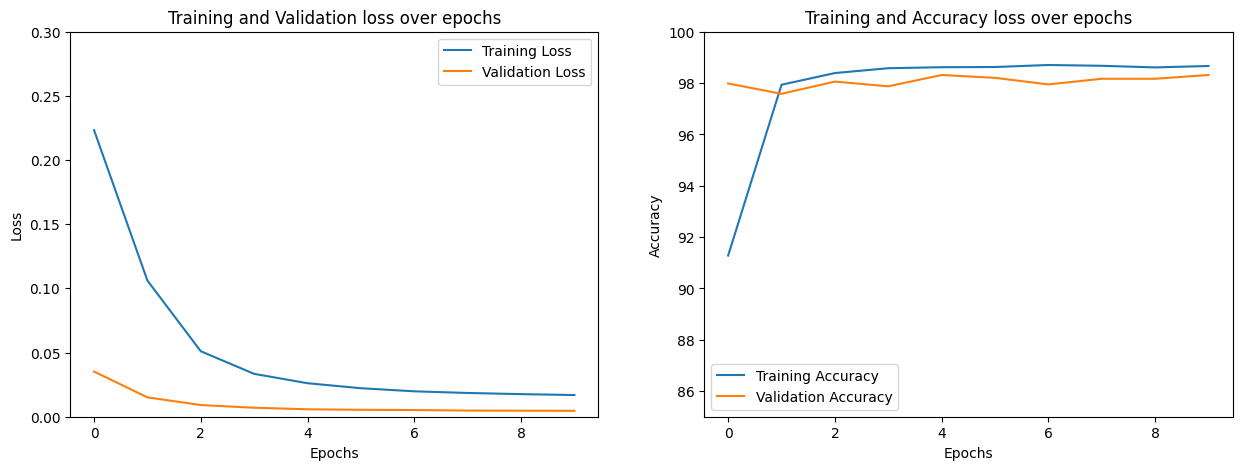

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axs[0].plot(total_loss_train_plot, label="Training Loss")
axs[0].plot(total_loss_validation_plot, label="Validation Loss")
axs[0].set_title("Training and Validation loss over epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,0.3])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="Training Accuracy")
axs[1].plot(total_acc__validation_plot, label="Validation Accuracy")
axs[1].set_title("Training and Accuracy loss over epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([85,100])
axs[1].legend()

plt.show()

In [32]:
area = float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/original_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/original_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/original_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/original_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/original_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/original_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/original_df['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))

Area: 6431
Major Axis Length: 145
Minor Axis Length: 56
Eccentricity: 0.91
Convex Area: 6518
EquivDiameter: 90
Extent: 0.85
Perimeter: 329
Roundness: 0.74
AspectRation: 2.55
tensor([0.8128], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  1
